In [1]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "final_clean_no_neutral_no_duplicates.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zphudzz/tweets-clean-posneg-v1",
  file_path,

)

print("First 5 records:", df.head())

/tmp/ipykernel_36/3464383947.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    target                                               text  \
0     0.0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1     0.0  is upset that he can't update his Facebook by ...   
2     0.0  @Kenichan I dived many times for the ball. Man...   
3     0.0    my whole body feels itchy and like its on fire    
4     0.0  @nationwideclass no, it's not behaving at all....   

                                          text_clean  text_length  \
0  awww thats a bummer you shoulda got david carr...           19   
1  is upset that he cant update his facebook by t...           21   
2  i dived many time for the ball managed to save...           18   
3       my whole body feel itchy and like it on fire           10   
4  no it not behaving at all im mad why am i here...           21   

   text_clean_length  
0                 16  
1                 21  
2                 16  
3                 10  
4                 20  


In [2]:
df = df.drop('text', axis=1)
df = df.drop('text_length', axis=1)
df = df.drop('text_clean_length', axis=1)
df.rename(columns={'text_clean': 'text', 'target': 'labels'}, inplace=True)
df

,labels,text
0,0.0,awww thats a bummer you shoulda got david carr...
1,0.0,is upset that he cant update his facebook by t...
2,0.0,i dived many time for the ball managed to save...
3,0.0,my whole body feel itchy and like it on fire
4,0.0,no it not behaving at all im mad why am i here...
...,...,...
1628161,4.0,engine growth modi unveils india first electri...
1628162,4.0,modi promised lok sabha election that best oro...
1628163,0.0,why these crore paid neerav modi not recovered...
1628164,0.0,dear rss terrorist payal gawar what about modi...


In [3]:
df = df.dropna().copy()
df['labels'] = df['labels'].astype(int)
print(df.dtypes)
print(df['labels'].value_counts())

labels     int64
text      object
dtype: object
labels
4    825423
0    802743
Name: count, dtype: int64


In [4]:
df['labels'] = df['labels'].replace(4, 1)
print(df['labels'].value_counts())

labels
1    825423
0    802743
Name: count, dtype: int64


In [5]:
import pandas as pd
# Step 1: Separate by label
df_1 = df[df['labels'] == 1]
df_0 = df[df['labels'] == 0]

# Step 2: Sample ~200k from each
df_1_sampled = df_1.sample(n=100000, random_state=42)
df_0_sampled = df_0.sample(n=100000, random_state=42)

# Step 3: Combine and shuffle
df_balanced = pd.concat([df_1_sampled, df_0_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced

,labels,text
0,0,he need to come to da hornet
1,1,thanks for the tweet greatly appreciated
2,0,just got home from seeing drag me to hell umm ...
3,1,well it wa a great trip but im so happy to be ...
4,1,thats so awesome that you follow soccer im a l...
...,...,...
199995,0,true though the noise is going to force me to ...
199996,0,so goodthats why i cant live without itman thi...
199997,0,home watching tv cant play cod waw a xbox live...
199998,0,hi i wa in the cab a wellbut we got separated ...


In [6]:
df_balanced = df_balanced[df_balanced['text'].str.strip().astype(bool)]
print(df_balanced['labels'].value_counts())

labels
1    99999
0    99996
Name: count, dtype: int64


In [ ]:
Step 1: Drop NaNs (if not already done)
df_balanced = df_balanced.dropna(subset=['text'])

# Step 2: Convert everything to string
df_balanced['text'] = df_balanced['text'].astype(str)
df_original = df_balanced.copy()

chat_word = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': "For What It's Worth",
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age Sex Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick with Laugher',
    'TFW': 'That feeling when',
    'MFW': 'My face when',
    'MRW': 'My reaction when',
    'IFYP': 'I feel your pain',
    'TNTL': 'Trying not to laugh',
    'JK': 'Just kidding',
    'IDC': "I do not care",
    'ILY': 'I love you',
    'IMU': 'I miss you',
    'ADIH': 'Another day in hell',
    'ZZZ': 'Sleeping bored tired',
    'WYWH': 'Wish you were here',
    'TIME': 'Tears in my eyes',
    'BAE': 'Before anyone else',
    'FIMH': 'Forever in my heart',
    'BSAAW': 'Big smile and a wink',
    'BWL': 'Bursting with laughter',
    'BFF': 'Best friends forever',
    'CSL': "Can not stop laughing",
    'IMMA': 'I am going to',
    'IM': 'i am',
    'CEO': 'Chief Executive Officer',
    'WHAT': 'whaaaaale Vitalii'
}
def short_conv(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_word:
            new_text.append(chat_word[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)



df_balanced.loc[:, 'text'] = df['text'].apply(short_conv)


In [ ]:
df_original_text = df_balanced.copy()

import string
exclude=string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

df_balanced.loc[:, 'text'] = df_balanced['text'].apply(remove_punc)

#df_preprocessed = df_balanced[df_original_text['text'] != df_balanced['text']]
#print(df_preprocessed)
#print(df_preprocessed.info())
df_balanced = df_balanced.dropna()

In [ ]:
df_balanced['text'] = df_balanced['text'].astype(str)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




df_balanced = df_balanced.dropna()

df_balanced.loc[:, 'text'] = df_balanced['text'].str.lower() # Make all text lowercased



df_original_text = df_balanced.copy()
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002700-\U000027BF"  # dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    text = remove_emojis(text)
    text = text.encode('ascii', 'ignore').decode()  # removes non-ASCII
    return text


df_balanced.loc[:, 'text'] = df_balanced['text'].apply(clean_text)

def remove_urls(text):
    if not isinstance(text, str):
        return ""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_balanced.loc[:, 'text'] = df_balanced['text'].apply(remove_urls)
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

def remove_emails(text):
    return re.sub(r'\S+@\S+', '', text)

def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)


def remove_junk(text):
    text = remove_html_tags(text)
    text = remove_mentions(text)
    text = remove_emails(text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

non_string_count = df_balanced['text'].apply(lambda x: not isinstance(x, str)).sum()
print(f"Non-string entries to delete: {non_string_count}")


df_balanced = df_balanced.dropna()
df_balanced['text'] = df_balanced['text'].astype(str)
df_balanced = df_balanced[df_balanced['text'].notna()].copy()

non_string_count = df_balanced['text'].apply(lambda x: not isinstance(x, str)).sum()
print(f"Non-string entries remained: {non_string_count}")


df_balanced.loc[:, 'text'] = df_balanced['text'].apply(remove_junk)

#display(df_balanced)




In [7]:

#FASTER version of Langdetect removal
!pip install langdetect
import langdetect
from langdetect import detect
from langdetect import detect_langs
from langdetect import detect, detect_langs
from langdetect.lang_detect_exception import LangDetectException



def is_english(text, threshold=0.90):
    try:
        langs = detect_langs(text)
        for lang in langs:
            if lang.lang == 'en' and lang.prob >= threshold: # If language in cell(row) is on 90% English than we keep it.
                return True
        return False
    except LangDetectException:   # Handles empty strings or gibberish
        return False

!pip install pandarallel

from pandarallel import pandarallel
pandarallel.initialize()


#df['is_en'] = df['text'].parallel_apply(is_english)

df_original = df_balanced.copy()
#df_non_En_removed = df_balanced[~df_balanced['text'].apply(is_english)]  # Save non-English rows
df_balanced = df_balanced[df_balanced['text'].parallel_apply(is_english)].reset_index(drop=True)
print(f"Original size: {len(df_original)}")
print(f"English rows kept: {len(df_balanced)}")
print(f"Non-English rows removed: {len(df_original) - len(df_balanced)}")
#print(df_non_En_removed[:10])'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=bf0af69c06966941ac507cb3f0bde7282d8d2aafe470e18793b723a83caa5743
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=aadbeb51f034b5cc121b7254c53d9b691551a894fd9f0062650904c335d13712
  Stored in directory: /root/.cache/pip/wheels/b9/c6/5a/829298789e94348b81af52ab42c19d49da007306bbcc983827
Successfully built pandarallel
INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
Original size: 199995
English rows kept: 162514
Non-English rows removed: 37481


In [8]:
df_balanced['labels'].value_counts()

labels
0    81781
1    80733
Name: count, dtype: int64

In [9]:
!pip install transformers datasets torch scikit-learn
import transformers
#!pip install --upgrade transformers
from transformers import Trainer, TrainingArguments, TrainerCallback, EarlyStoppingCallback
from datasets import load_dataset
import torch

'''
from transformers import DistilBertTokenizer, DistilBertConfig, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
config = DistilBertConfig.from_pretrained("distilbert-base-uncased", num_labels=2, dropout=0.2)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", config=config)
'''

from transformers import BertConfig, BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
#model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
config = BertConfig.from_pretrained('bert-base-uncased', num_labels=2, hidden_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

from datasets import Dataset

# Rename label column if needed
#df_hf_multi_all = df_hf_multi_all.rename(columns={'label': 'labels'})

# Convert to Dataset
dataset = Dataset.from_pandas(df_balanced)

#We got rid of dynamic padding. We want to check how it will affect accuracy and speed
#def tokenize_function(example):

#    return tokenizer(example['text'], padding=max, truncation=True)
def tokenize_function(example):
    return tokenizer(example['text'], padding="max_length", truncation=True, max_length=128)#You also can try with 512

tokenized_dataset = dataset.map(tokenize_function, batched=True)
#print(tokenized_dataset)
#print(tokenized_dataset[1])
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

#from transformers import DataCollatorWithPadding

from sklearn.model_selection import train_test_split

train_test_val = tokenized_dataset.train_test_split(test_size=0.3)

train_set = train_test_val['train']

val_test_data = train_test_val['test']
test_val = val_test_data.train_test_split(test_size=0.5)
test_set = test_val["train"]
val_set = test_val["test"]

from collections import Counter

from datasets import DatasetDict

# Example structure
dataset = DatasetDict({
    "train": train_set,
    "validation": val_set,
    "test": test_set
})

dataset['train'] = dataset['train'].remove_columns(['text'])

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

from copy import deepcopy

val_set_log = deepcopy(val_set)

#val_set_log = val_set.copy() # It will not work. By the way val_set and dataset['validation'] - share the same memory, so changes to one will affect another one

val_set_log.reset_format()
#test_set.reset_format()
class MisclassificationLoggerCallback(TrainerCallback):
    def __init__(self, eval_dataset, tokenizer, val_set_log, max_examples=10):
        self.eval_dataset = eval_dataset #here goes --> dataset['validation']
        self.tokenizer = tokenizer
        self.max_examples = max_examples
        self.trainer = None  # Will be set manually
        self.val_set_log = val_set_log

    def set_trainer(self, trainer):
        self.trainer = trainer

    def on_evaluate(self, args, state, control, **kwargs):
        if self.trainer is None:
            print("⚠️ Trainer not set in callback.")
            return

        predictions = self.trainer.predict(self.eval_dataset)
        preds = predictions.predictions.argmax(-1)
        labels = predictions.label_ids

        print(f"\n🔍 Misclassifications after Epoch {int(state.epoch)}:")
        count = 0
        for i, (pred, label) in enumerate(zip(preds, labels)):
            if pred != label:
                text = self.val_set_log["text"][i] #val_set_log[i]['text']
                #tokenized_txt = tokenizer.decode(self.eval_dataset[i]['input_ids'].tolist(), skip_special_tokens=True)
                print(f"[{i}] Pred: {pred}, True: {label}, Text: {text[:100]}...")
                count += 1
                if count >= self.max_examples:
                    break




#from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    warmup_steps=500,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_strategy='steps',
    logging_steps=50,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=2,
    num_train_epochs=4,
    learning_rate=2e-5,
    weight_decay=0.01,
    metric_for_best_model='accuracy',
    greater_is_better=True,
    load_best_model_at_end=True,
    label_smoothing_factor=0.1,
    fp16=True,
    save_total_limit=2,
    report_to='none'
)

misclass_callback = MisclassificationLoggerCallback(eval_dataset=dataset['validation'], tokenizer=tokenizer, val_set_log=val_set_log)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2),
               #MisclassificationLoggerCallback(eval_dataset=dataset['validation'], tokenizer=tokenizer, trainer=trainer)
               misclass_callback
               ]
    #data_collator=data_collator # Also added colletor for Dynamic Padding
)

# ✅ Inject trainer into callback
misclass_callback.set_trainer(trainer)

dataset['train']

print("Finish!!!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: 

2025-08-19 09:33:24.941983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755596005.288814      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755596005.387027      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/162514 [00:00<?, ? examples/s]

Finish!!!


In [10]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.480000,0.469285,0.827672,0.827672,0.827671,0.827673
2,0.433800,0.475284,0.825252,0.824554,0.830082,0.825073
3,0.421600,0.466874,0.835343,0.835213,0.836221,0.835268
4,0.416100,0.472417,0.836287,0.836207,0.836799,0.836229



🔍 Misclassifications after Epoch 1:
[2] Pred: 0, True: 1, Text: the britbots are coming little too sketchy between pr and bot fade them out a bit...
[17] Pred: 1, True: 0, Text: nice thx now let see if this is torus herself posting like god trent reznor doe it or if someone doe...
[18] Pred: 0, True: 1, Text: it is time for me to leave work now would you kindly ask the young lawn mower to stop please...
[30] Pred: 0, True: 1, Text: no no my brother gf lucy made it she went through my photo on fb and printed her fave one and then m...
[39] Pred: 1, True: 0, Text: eating coonfila before a twohour lecture ftmfl itisssssssss...
[42] Pred: 0, True: 1, Text: my poor sel i hope the torture end soon...
[48] Pred: 0, True: 1, Text: good thing i just ate or id be heading to the airport...
[49] Pred: 1, True: 0, Text: all of you guy who istalled on your iphones let me know hows it working for you much better im still...
[50] Pred: 1, True: 0, Text: good luck have fun im off to the job centre...


TrainOutput(global_step=14220, training_loss=0.44899434560461887, metrics={'train_runtime': 9125.6824, 'train_samples_per_second': 49.863, 'train_steps_per_second': 1.558, 'total_flos': 2.993125054669824e+16, 'train_loss': 0.44899434560461887, 'epoch': 4.0})

In [11]:
predictions = trainer.predict(dataset['test'])


In [14]:
import numpy as np

y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids


In [15]:
import numpy as np

y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))


Accuracy: 0.8354186323173484

Classification Report:
               precision    recall  f1-score   support

           0     0.8198    0.8607    0.8398     12214
           1     0.8527    0.8101    0.8308     12163

    accuracy                         0.8354     24377
   macro avg     0.8363    0.8354    0.8353     24377
weighted avg     0.8362    0.8354    0.8353     24377


Confusion Matrix:
 [[10512  1702]
 [ 2310  9853]]


In [17]:
#import numpy as np

labels = np.unique(y_true)
for label in labels:
    mask = y_true == label
    correct = (y_pred[mask] == y_true[mask]).sum()
    total = mask.sum()
    acc = correct / total
    print(f"Accuracy for label {label}: {acc:.4f} ({correct}/{total})")


Accuracy for label 0: 0.8607 (10512/12214)
Accuracy for label 1: 0.8101 (9853/12163)


In [18]:
test_df = dataset['test'].to_pandas()
test_df['true_label'] = y_true
test_df['predicted_label'] = y_pred
misclassified = test_df[test_df['true_label'] != test_df['predicted_label']]
print(misclassified[['text', 'true_label', 'predicted_label']].head(10))

                                                 text  true_label  \
1   tell me about iti just about managed to sleep ...           0   
3      dont forget the fish youre going out again x x           0   
5   my hair is short now i had my hair cut but the...           0   
10  whats the point in a beer garden if you dont l...           0   
13  ty and youre a big girl yet you want to teach ...           1   
15              line vine and trying time is tomorrow           1   
16  oh yes i did i guess the shot were just for th...           0   
20  thank uu u watching mtvmas i streamed them las...           1   
24  haha im laughing hysterically at the fact that...           0   
26    had a great weekend not ready for monday though           1   

    predicted_label  
1                 1  
3                 1  
5                 1  
10                1  
13                0  
15                0  
16                1  
20                0  
24                1  
26                0 

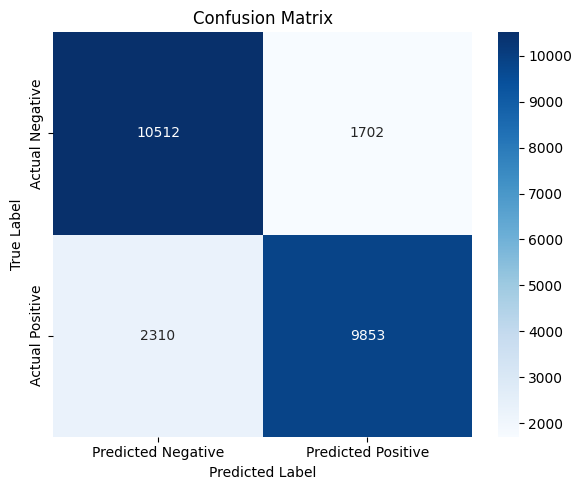

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [24]:
print(trainer.model.config._name_or_path)
print(trainer.state.best_model_checkpoint)


bert-base-uncased
./results/checkpoint-14220


In [27]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('./results/checkpoint-10665')
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
    tokenizer=tokenizer
)


/tmp/ipykernel_36/2143059999.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [28]:
predictions = trainer.predict(dataset['test'])

y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.8355827214177298

Classification Report:
               precision    recall  f1-score   support

           0     0.8168    0.8661    0.8407     12214
           1     0.8569    0.8049    0.8301     12163

    accuracy                         0.8356     24377
   macro avg     0.8368    0.8355    0.8354     24377
weighted avg     0.8368    0.8356    0.8354     24377


Confusion Matrix:
 [[10579  1635]
 [ 2373  9790]]


In [29]:
model.save_pretrained('./final_model_epoch3_checkpoint10665')
tokenizer.save_pretrained('./final_model_epoch3_checkpoint10665')

('./final_model_epoch3_checkpoint10665/tokenizer_config.json',
 './final_model_epoch3_checkpoint10665/special_tokens_map.json',
 './final_model_epoch3_checkpoint10665/vocab.txt',
 './final_model_epoch3_checkpoint10665/added_tokens.json')

In [30]:
'''import shutil
shutil.make_archive("checkpoint-10665", 'zip', "results/checkpoint-10665")
import os
os.rename("checkpoint-10665.zip", "/kaggle/working/checkpoint-10665.zip")'''

In [31]:
import shutil
shutil.make_archive("final_model_epoch3_checkpoint10665", 'zip', "final_model_epoch3_checkpoint10665")
import os
os.rename("final_model_epoch3_checkpoint10665.zip", "/kaggle/working/final_model_epoch3_checkpoint10665.zip")


In [33]:
from huggingface_hub import notebook_login
notebook_login()

'''
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("your-username/your-model-name")
tokenizer = AutoTokenizer.from_pretrained("your-username/your-model-name")
'''

'\nfrom transformers import AutoModelForSequenceClassification, AutoTokenizer\n\nmodel = AutoModelForSequenceClassification.from_pretrained("your-username/your-model-name")\ntokenizer = AutoTokenizer.from_pretrained("your-username/your-model-name")\n'

In [34]:
model.push_to_hub("sentiment-tweets-pos-neg-epoch3")
tokenizer.push_to_hub("sentiment-tweets-pos-neg-epoch3")

Uploading...:   0%|          | 0.00/438M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Mentalii/sentiment-tweets-pos-neg-epoch3/commit/099d44905398b402f391d275ab471195c2473658', commit_message='Upload tokenizer', commit_description='', oid='099d44905398b402f391d275ab471195c2473658', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Mentalii/sentiment-tweets-pos-neg-epoch3', endpoint='https://huggingface.co', repo_type='model', repo_id='Mentalii/sentiment-tweets-pos-neg-epoch3'), pr_revision=None, pr_num=None)

In [ ]:
#trainer.save_model("path/to/your_model")
#tokenizer.save_pretrained("path/to/your_model")

#trainer.save_model("my_model")
#tokenizer.save_pretrained("my_model")

#config.json

#pytorch_model.bin

#tokenizer_config.json

#vocab.txt or merges.txt (depending on tokenizer)

In [ ]:
#from transformers import AutoModelForSequenceClassification, AutoTokenizer

#model = AutoModelForSequenceClassification.from_pretrained("path/to/your_model")
#tokenizer = AutoTokenizer.from_pretrained("path/to/your_model")

In [ ]:
#import shutil

#shutil.make_archive("my_model", 'zip', "my_model")

#from google.colab import files
#files.download("my_model.zip")



In [ ]:
# To save your model in Hugging face
'''from huggingface_hub import notebook_login
notebook_login()

trainer.push_to_hub("your-model-name")
tokenizer.push_to_hub("your-model-name")
'''